In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [ ]:
#os.chdir("../Datastets")
#myData = pd.read_csv(r'C:\Users\Paul\Projects\Skill_Notebooks\Module_5\DataSets\mycar.csv')
myData = pd.read_csv(r'C:\Users\wangshu202040\Skill_Notes\Module_5\DataSets\mycar.csv')

In [ ]:
myData.head()

In [ ]:
myData.shape

In [ ]:
X = myData.iloc[:,:-1].values
Y = myData.iloc[:,1].values

In [2]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression()
myModel.fit(X_train,Y_train)

In [ ]:
y_pred = myModel.predict(X_test)
y_pred

# <span style="color: orange; font-weight: bold; font-size:16pt">3A.5 Линейная регрессия. Предобработка</span>

In [ ]:
colors = ['#50248f', '#38d1ff']
sns.palplot(sns.color_palette(colors))

In [ ]:
data = pd.read_csv(r'C:/Users/wangshu202040/Skill_Notes/Module_5/DataSets/data_flats2.csv', sep = ';')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
cols = data.columns
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colors))

У нас пропуски по сути есть только в одном признаке — жилой площади. Просто не будем брать её в модель.

Далее всегда есть смысл посмотреть на распределение нашей целевой переменной и понять, какие значения мы будем предсказывать:

In [ ]:
data.price_doc.hist();

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

In [ ]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w+1))
data.price_doc.hist();

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

In [ ]:
sns.set(font_scale=1)
plt.subplots(figsize = (12,12))
sns.heatmap(data.corr(),square = True,
           annot = True, fmt = '.1f',linewidths=.1,cmap='RdBu')

In [ ]:
cols_to_del = ['id','preschool_education_centers_raion','kindergarten_km','park_km','kremlin_km','life_sq']

In [ ]:
data1 = data.drop(cols_to_del,axis=1)

In [ ]:
data1 = data1.dropna()

In [ ]:
# X = data1.iloc[:,:-1].values
# Y = data1.iloc[:,1].values

X = data1.drop(['price_doc'],axis = 1)
Y = data1['price_doc']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=77)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rc = RobustScaler()
X_train_tr = rc.fit_transform(X_train)
X_test_tr = rc.transform(X_test)

## Model

In [ ]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression()
myModel.fit(X_train_tr,Y_train)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
Y_pred = myModel.predict(X_test_tr)
MSE = np.round(mse(np.exp(Y_test)-1,np.exp(Y_pred)-1),0)

In [ ]:
print(f'MSE = {MSE}')

# <span style="color: orange; font-weight: bold; font-size:16pt">3A.6. Линейная регрессия. Практика №1</span>

In [31]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

## 1. Линейная регрессия. Реализация

In [43]:
data = load_boston()
data['data'].shape

(506, 13)

### 1.1. Реализация линейной регрессии с использованием матричных операций

Линейная регрессия выражается следующей зависимостью:
$$y=X\theta+\epsilon,$$
где $X$ — матрица объекты-признаки, $y$ — вектор целевых значений, соответствующих $X$, $\theta$ — параметр линейной регрессии, $\epsilon$ — некоторый шум.

Из данного следует выражение для $\theta$ как:
$$X^Ty=X^TX\theta \rightarrow \theta=(X^TX)^{-1}X^Ty$$

Реализуем выражение для $\theta$ с помощью операций линейной алгебры библиотеки Numpy:

In [44]:
def linreg_linear(X,y):
    theta = np.linalg.solve(X.T@X, X.T@y)
    return theta

In [45]:
# Подготовить данные

X, y = data['data'], data['target']

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [46]:
# Вычислить параметр theta
theta = linreg_linear(X,y)

In [47]:
theta.shape

(14,)

In [48]:
# Сделать предсказания для тренировочной выборки
y_pred = np.dot(X,theta)

In [49]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    print (f'MSE = {mse:.2f}, RMSE= {rmse:.2f}')

In [50]:
# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE= 4.68


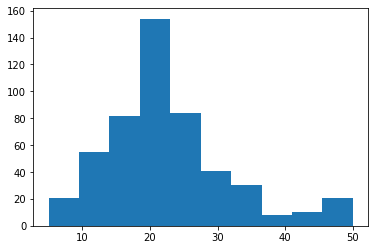

In [40]:
plt.hist(y);

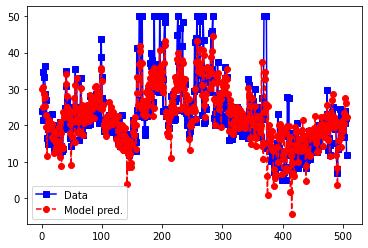

In [41]:
# plot data and model prediction
N=len(y)
plt.plot(np.arange(1,N+1),y,'bs-',label='Data')
plt.plot(np.arange(1,N+1),y_pred,'ro--',label='Model pred.')

plt.legend()
plt.show()

In [ ]:
# Разбить выборку на train/valid, вычислить theta,
# сделать предсказания и посчитать ошибки MSE и RMSE

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = linreg_linear(X_train, y_train)
y_pred = X_valid.dot(theta)
y_train_pred = X_train.dot(theta)

In [ ]:
print_regression_metrics(y_valid, y_pred)
print_regression_metrics(y_train, y_train_pred)

### Задание 3.6.2

Постройте модель при помощи sklearn. Используйте параметры по умолчанию, обучите на всей выборке и посчитайте RMSE.
Ответ округлите до сотых. Пример ввода: 5.55.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print_regression_metrics(y,y_pred)

In [ ]:
X, y = data['data'], data['target']

In [ ]:
df = pd.DataFrame(X)
A = df.describe().reset_index()
A.loc[A['index'] == 'std'].max()

 ### Задание 3.6.4

Обучите регрессию без дополнительного столбца единиц. Какой получился RMSE?
Ответ округлите до сотых. Пример ввода: 5.55.

In [15]:
# Подготовить данные
X, y = data['data'], data['target']
# Вычислить параметр theta
theta = linreg_linear(X,y)

# Сделать предсказания для тренировочной выборки
y_pred = np.dot(X,theta)
# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 24.17, RMSE= 4.92


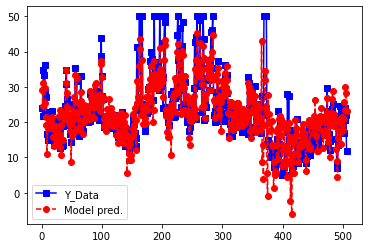

In [19]:
# compute the model-predicted values
yHat = X@theta
N = len(y)

# plot data and model prediction
plt.plot(np.arange(1,N+1),y,'bs-',label='Y_Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

### Задание 3.6.5

Очистите данные от строк, где значение признака  меньше . Какой получился RMSE?
Ответ округлите до сотых. Пример ввода: 5.55.

In [54]:
X = pd.DataFrame(data = data['data'],columns=data['feature_names'])
y = data['target']
X['ones'] = 1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
